In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import urllib, json

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Introduction to Networkx

The simple methods '.nodes()' and '.edges()' print the key components of the network.

In [2]:
HG = nx.house_graph()
HG.nodes()
HG.edges()

NodeView((0, 1, 2, 3, 4))

EdgeView([(0, 1), (0, 2), (1, 3), (2, 3), (2, 4), (3, 4)])

## Drawing the network

To draw the network, we need to give it a dictionary that maps each node to an X-Y coordinate. I give one below.

{0: Text(0, 0, '0'),
 1: Text(1, 0, '1'),
 2: Text(0, 1, '2'),
 3: Text(1, 1, '3'),
 4: Text(0.5, 2.0, '4')}

(-0.10500000000000001, 1.105, -0.21000000000000002, 2.21)

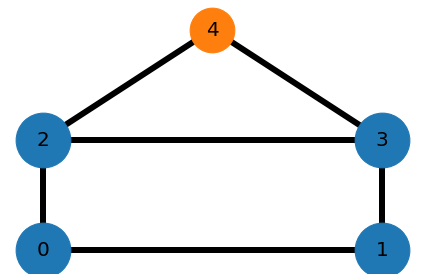

In [5]:
pos = {0: (0, 0), 1: (1, 0), 2: (0, 1), 3: (1, 1), 4: (0.5, 2.0)}

nx.draw_networkx_nodes(
    HG, pos, node_size=3000, nodelist=[0, 1, 2, 3], 
    node_color="tab:blue"
)

nx.draw_networkx_nodes(HG, pos, node_size=2000, 
                       nodelist=[4], node_color="tab:orange")

nx.draw_networkx_edges(HG, pos, alpha=1, width=6)
nx.draw_networkx_labels(HG, pos, font_size=20)
plt.tight_layout()
plt.axis("off")

In [8]:
ADJ = nx.to_pandas_adjacency(HG)
ADJ = ADJ.astype(bool)

0      1      2      3      4
0  False   True   True  False  False
1   True  False  False   True  False
2   True  False  False   True   True
3  False   True   True  False   True
4  False  False   True   True  False

In [9]:
deg_0 = nx.degree(HG, 0) 
deg_0

2

# Activity
We will learn how to process a dataframe into a useable edgelist to feed into a graph.

In [11]:
df = pd.read_pickle("../public_data/Raw_Tweets.pkl") # Load your tweets
df.head()
df.shape

tweetid      userid                            date lang  \
12221  1221208309728006145   418859255  Sat Jan 25 23:08:44 +0000 2020   en   
28315  1221213073652043776    14499829  Sat Jan 25 23:27:40 +0000 2020   en   
6092   1222281847163576321  1135486501  Tue Jan 28 22:14:35 +0000 2020   en   
13618  1222289121118511104   117793973  Tue Jan 28 22:43:30 +0000 2020   en   
19205  1222285279047843843  1465196934  Tue Jan 28 22:28:14 +0000 2020   en   

                                                    text  \
12221  RT @DepSecHargan: Every year in the US, 34,800...   
28315  WHO’s risk assessment of the new #coronavirus ...   
6092   #FYI: 50 million are under travel restrictions...   
13618  What should I do if I have traveled to China a...   
19205  Disease outbreaks can result in misinformation...   

                            tweet_type  friends_count  followers_count  \
12221  retweeted_tweet_without_comment            638             1837   
28315                         original           1743          5196950   
6092                          original            950            27025   
13618                         original           1236             5860   
19205                         original           1946             3581   

       statuses_count             mentionid     rt_userid    rt_tweetid  \
12221           17778  [920035992073064450]  9.200360e+17  1.221208e+18   
28315           46697                    []           NaN           NaN   
6092            11145             [9624742]           NaN           NaN   
13618            4578                    []           NaN           NaN   
19205            4636                    []           NaN           NaN   

       qtd_userid qtd_text  qtd_tweetid  
12221         NaN      NaN          NaN  
28315         NaN      NaN          NaN  
6092          NaN      NaN          NaN  
13618         NaN      NaN          NaN  
19205         NaN      NaN          NaN

(59887, 15)

### 1.1 Subset the dataframe to network data

- First, using .value_counts(), identify how many types of tweets there are, using the tweet_type column. 
- Then, filter out all tweets that are not "retweeted_tweet_without_comment" and "quoted_tweet."

In [1]:
# your code here
df.tweet_type.value_counts()

In [20]:
df = df[(df.tweet_type == "retweeted_tweet_without_comment") | (df.tweet_type == "quoted_tweet")]

In [ ]:
## Run this. Why is it empty?
df[(df.tweet_type == "retweeted_tweet_without_comment") & (df.tweet_type == "quoted_tweet")]

### 1.2 Create an edgelist

The "userid" column shows the person that did the retweeting. Create a new column called "userid2" that denotes the user retweeted. You will need to use the columns "rt_userid" and "qtd_userid."

In [29]:
%%time
user2 = []
for i,r in df.iterrows():
    if np.isnan( r.rt_userid ):
        user2.append(r.qtd_userid)
    else:
        user2.append(r.rt_userid)
df["user2"] = user2

CPU times: user 876 ms, sys: 11.4 ms, total: 888 ms
Wall time: 887 ms


In [34]:
%%time
df["user2"] = np.where(df.rt_userid.isnull(), df.qtd_userid, df.rt_userid)
df

CPU times: user 1.59 ms, sys: 4.75 ms, total: 6.33 ms
Wall time: 10.8 ms


tweetid      userid                            date lang  \
12221   1221208309728006145   418859255  Sat Jan 25 23:08:44 +0000 2020   en   
25575   1222280171501256706    20467163  Tue Jan 28 22:07:56 +0000 2020   en   
28489   1222283902724820995   426033838  Tue Jan 28 22:22:46 +0000 2020   en   
28496   1222283757119590405   426033838  Tue Jan 28 22:22:11 +0000 2020   en   
12992   1220696703667326976   426033838  Fri Jan 24 13:15:48 +0000 2020   en   
...                     ...         ...                             ...  ...   
178123  1311697178453254145    13218102  Thu Oct 01 15:59:12 +0000 2020   en   
71249   1320008044714098688  2987671552  Sat Oct 24 14:23:37 +0000 2020   en   
111383  1320011408311001090  2891165960  Sat Oct 24 14:36:59 +0000 2020   en   
159487  1320015440249225218    44783853  Sat Oct 24 14:53:00 +0000 2020   en   
166622  1320016039103598592  3218464527  Sat Oct 24 14:55:23 +0000 2020   en   

                                                     text  \
12221   RT @DepSecHargan: Every year in the US, 34,800...   
25575   RT @RCCallihan: The declaration of a public he...   
28489   RT @DepSecHargan: Start the #NewYear off right...   
28496   RT @CDCFlu: Elevated #flu activity is expected...   
12992   RT @CDCemergency: Is it a cold or flu? What’s ...   
...                                                   ...   
178123  RT @TexasDSHS: Today is #TexasFluDay! A yearly...   
71249   RT @MDHealthDept: Today, @MDHealthDept reports...   
111383  RT @unmc: .@HHSGov Deputy Secretary, Eric D. H...   
159487  RT @CDCgov: Today is a good day to talk with y...   
166622  RT @PennsylvaniaGov: Today is Drug #TakeBackDa...   

                             tweet_type  friends_count  followers_count  \
12221   retweeted_tweet_without_comment            638             1837   
25575   retweeted_tweet_without_comment          10261            30106   
28489   retweeted_tweet_without_comment            625             1823   
28496   retweeted_tweet_without_comment            625             1823   
12992   retweeted_tweet_without_comment            625             1822   
...                                 ...            ...              ...   
178123  retweeted_tweet_without_comment          12181           290055   
71249   retweeted_tweet_without_comment            998           206890   
111383  retweeted_tweet_without_comment           1212            32893   
159487  retweeted_tweet_without_comment            396          1013652   
166622  retweeted_tweet_without_comment            953            65927   

        statuses_count                        mentionid     rt_userid  \
12221            17778             [920035992073064450]  9.200360e+17   
25575             2762          [1697808410, 146569971]  1.697808e+09   
28489            22314  [920035992073064450, 146569971]  9.200360e+17   
28496            22314                       [16616061]  1.661606e+07   
12992            22325                       [19658936]  1.965894e+07   
...                ...                              ...           ...   
178123           40056                       [68412042]  6.841204e+07   
71249             9632             [44961877, 44961877]  4.496188e+07   
111383            8014             [16151917, 44783853]  1.615192e+07   
159487           22511                      [146569971]  1.465700e+08   
166622           14938                     [3762413663]  3.762414e+09   

          rt_tweetid  qtd_userid qtd_text  qtd_tweetid         user2  
12221   1.221208e+18         NaN      NaN          NaN  9.200360e+17  
25575   1.222247e+18         NaN      NaN          NaN  1.697808e+09  
28489   1.222239e+18         NaN      NaN          NaN  9.200360e+17  
28496   1.222194e+18         NaN      NaN          NaN  1.661606e+07  
12992   1.220488e+18         NaN      NaN          NaN  1.965894e+07  
...              ...         ...      ...          ...           ...  
178123  1.311671e+18         NaN      NaN          

In [35]:
%%time
df.rt_userid.combine_first(df.qtd_userid)

CPU times: user 5.23 ms, sys: 4.46 ms, total: 9.69 ms
Wall time: 14.1 ms


12221     9.200360e+17
25575     1.697808e+09
28489     9.200360e+17
28496     1.661606e+07
12992     1.965894e+07
              ...     
178123    6.841204e+07
71249     4.496188e+07
111383    1.615192e+07
159487    1.465700e+08
166622    3.762414e+09
Name: rt_userid, Length: 26320, dtype: float64

In [37]:
%%time
df.rt_userid.fillna(0) + df.qtd_userid.fillna(0)

CPU times: user 4.06 ms, sys: 2.82 ms, total: 6.88 ms
Wall time: 6.15 ms


12221     9.200360e+17
25575     1.697808e+09
28489     9.200360e+17
28496     1.661606e+07
12992     1.965894e+07
              ...     
178123    6.841204e+07
71249     4.496188e+07
111383    1.615192e+07
159487    1.465700e+08
166622    3.762414e+09
Length: 26320, dtype: float64

### 1.3 Sentiment scoring. 
- Now, use SentimentIntensityAnalyzer to label the sentiment of the text, in a new column called "weight." 
- The subset the dataframe to only have "userid", "user2", and "weight". 
- Rename "userid" to "user1", then group by "user1" and "user2", to find the mean sentiment (mean weight).

You now have your first edgelist!

In [42]:
%%time
S = SentimentIntensityAnalyzer()
df["vaderSent"] = df.text.apply(lambda x: S.polarity_scores(x)["compound"])

CPU times: user 4.87 s, sys: 26.2 ms, total: 4.9 s
Wall time: 4.91 s


In [45]:
df = df[["userid", "user2", "vaderSent"]]
df.columns = ["user1", "user2", "weights"]

In [47]:
df.groupby(["user1", "user2"])["weights"].mean().reset_index()

user1         user2  weights
0                 5558312  5.558312e+06   0.7263
1                 5558312  2.009386e+07   0.6705
2                 5558312  2.056292e+07   0.5106
3                 5558312  2.874303e+07   0.5106
4                 5558312  5.090780e+07   0.8831
...                   ...           ...      ...
9365   815952318487298048  1.008376e+18   0.4404
9366   815952318487298048  1.080866e+18  -0.4019
9367  1075205691621720064  3.382592e+09   0.0000
9368  1075205691621720064  1.075206e+18   0.7717
9369  1075205691621720064  1.083126e+18   0.0000

[9370 rows x 3 columns]

# Netwulf Visualization
#### If you don't have the module, pip install netwulf
#### https://netwulf.readthedocs.io/en/latest/about.html

In [48]:
EL =  pd.read_pickle("../public_data/edge_list_final2.pkl")

In [50]:
EL[["user1","user2"]].values

array([[ 426033838,  146569971],
       [ 418859255,  146569971],
       [ 418859255,  146569971],
       ...,
       [2953974395,    5558312],
       [2953974395, 1209417007],
       [  18023868,   23711785]])

In [51]:
G = nx.Graph() # Creates a graph object
G.add_edges_from( EL[["user1","user2"]].values ) # Adds edges (and hence nodes from the edgelist)

# Creates the biggest subgraph
CC_nodes = list( nx.connected_components(G) )[0] # Generates a list of connected components, extracts the largest
GG = nx.subgraph(G, CC_nodes) # Creates the subgraph of the largest CC

In [52]:
from netwulf import visualize
import netwulf as nw

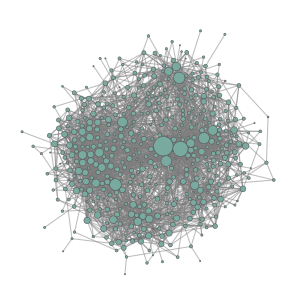

In [53]:
stylized_network, config = visualize(GG,)

In [54]:
U = pd.read_pickle("../public_data/UserInfo.pkl")
id2color = dict(zip(U.userid.values, U.PlotColor.values))
for k, v in GG.nodes(data=True):
    v["group"] = id2color[k]

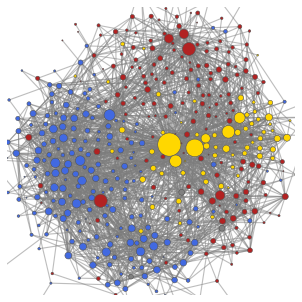

In [55]:
stylized_network, config = visualize(GG,port=2000)

### Activity Two
- Create a new column in U called "Degree," which denotes the degree of the node (userid). You will want to use G.degree()[n] where n is the userid.
- Group by User Type. Which group was the most popular during the pandemic?

In [68]:
%%time
DEG = pd.DataFrame(G.degree(), columns = ["userid", "degree"])
U = U.merge(DEG) 

CPU times: user 8.09 ms, sys: 10.5 ms, total: 18.6 ms
Wall time: 21.2 ms


In [70]:
U.groupby("User_type")["degree"].mean()

User_type
Democrat           12.529703
Health Official    19.087500
Independent        16.000000
Republican          8.968586
Name: degree, dtype: float64

In [ ]:
# your code here.

In [72]:
df.user1.value_counts(), df.user2.value_counts()

user1
2910903323    1833
418859255     1809
426033838     1661
14499829      1077
123926499      800
              ... 
18805303         1
37007274         1
402719755        1
234374703        1
45550693         1
Name: count, Length: 452, dtype: int64